Columnas disponibles: ['departamento', 'municipio', 'sexo', 'año_registrado', 'edad', 'periodo', 'etnia', 'escolaridad', 'ocupacion', 'causa', 'asistencia', 'lugar']
Media de edad: 61.55
Mediana: 62.0
Moda: 1
Desviación estándar: 82.41
Percentiles:
0.25    34.0
0.50    62.0
0.75    78.0
Name: edad, dtype: float64


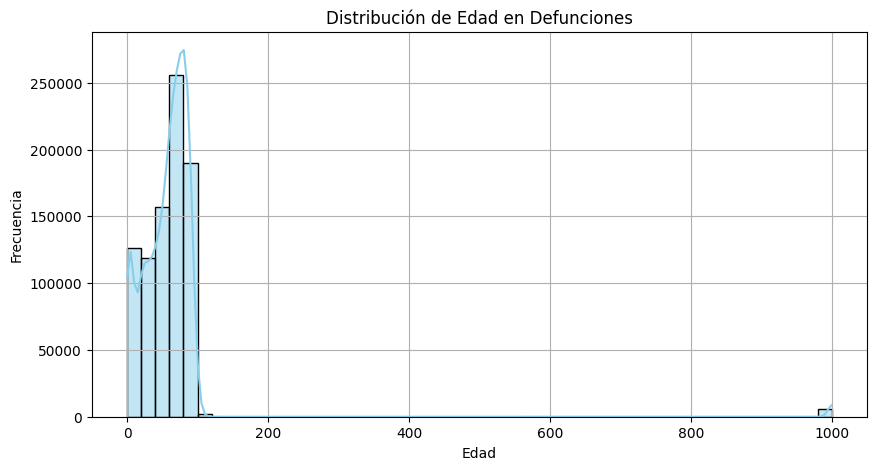

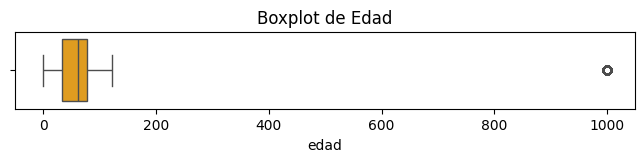


Frecuencia de sexo:

sexo
1.0    480556
2.0    374851
Name: count, dtype: int64

Frecuencia de etnia:

etnia
4.0    411148
1.0    217962
9.0    143746
NaN     72657
5.0      9195
3.0       371
2.0       328
Name: count, dtype: int64

Frecuencia de departamento:

departamento
1.0     249498
9.0      54541
16.0     50846
5.0      49574
12.0     49537
13.0     47907
14.0     41807
10.0     32196
4.0      30097
8.0      25464
22.0     24668
6.0      23834
17.0     22140
20.0     21297
7.0      20499
18.0     20453
3.0      19527
11.0     17850
21.0     16538
19.0     15500
15.0     12434
2.0       9200
Name: count, dtype: int64

Frecuencia de escolaridad:

escolaridad
1.0    453598
2.0    233105
4.0     57398
9.0     56472
3.0     40381
5.0     14157
6.0       296
Name: count, dtype: int64


In [5]:
# 📊 Análisis Estadístico del archivo defunciones_clean.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo limpio
df = pd.read_csv("defunciones_clean.csv", low_memory=False)

# Mostrar columnas disponibles
print("Columnas disponibles:", df.columns.tolist())

# Verificar y analizar la edad
if 'edad' in df.columns:
    df["edad"] = pd.to_numeric(df["edad"], errors='coerce')
    df = df[df["edad"] >= 0]

    media = df["edad"].mean()
    mediana = df["edad"].median()
    moda = df["edad"].mode().values[0]
    desviacion = df["edad"].std()
    percentiles = df["edad"].quantile([0.25, 0.5, 0.75])

    print("Media de edad:", round(media, 2))
    print("Mediana:", mediana)
    print("Moda:", moda)
    print("Desviación estándar:", round(desviacion, 2))
    print("Percentiles:")
    print(percentiles)

    # Histograma
    plt.figure(figsize=(10,5))
    sns.histplot(df["edad"], bins=50, kde=True, color='skyblue')
    plt.title("Distribución de Edad en Defunciones")
    plt.xlabel("Edad")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df["edad"], color='orange')
    plt.title("Boxplot de Edad")
    plt.show()
else:
    print("La columna 'edad' no se encuentra en el archivo.")

# 🔹 Tablas de frecuencia para variables categóricas corregidas
categoricas = ["sexo", "etnia", "departamento", "escolaridad"]

for col in categoricas:
    if col in df.columns:
        print(f"\nFrecuencia de {col}:\n")
        print(df[col].value_counts(dropna=False))
    else:
        print(f"\nLa columna '{col}' no se encuentra en el archivo.")


El análisis estadístico de las defunciones ocurridas en Guatemala entre 2012 y 2021 revela una distribución que refleja con claridad las condiciones estructurales del sistema de salud y los determinantes sociales de la mortalidad. La media de edad al fallecer es de 61.55 años y la mediana de 62, lo cual sugiere que la mayoría de las defunciones se concentran en personas adultas y adultas mayores, una tendencia común en países donde las enfermedades crónicas no transmisibles son prevalentes. Sin embargo, el dato más preocupante es que la moda corresponde a 1 año de edad, lo que indica una elevada cantidad de muertes en menores de un año, posiblemente asociadas a causas prevenibles como condiciones perinatales, infecciones respiratorias o falta de atención médica oportuna. Este fenómeno evidencia brechas críticas en la cobertura de salud materno-infantil y podría vincularse a factores como pobreza, malnutrición o falta de acceso a servicios básicos. Por otro lado, la desviación estándar elevada y la presencia de edades cercanas a los 1,000 años, detectadas como valores atípicos, sugiere que existen inconsistencias en la calidad del registro, lo cual limita parcialmente la fiabilidad del análisis si no se depuran adecuadamente. Al revisar variables categóricas como el sexo, la etnia y el departamento, se evidencian disparidades notorias: algunos departamentos presentan una cantidad significativamente mayor de defunciones, lo cual podría reflejar tanto una mayor densidad poblacional como inequidades históricas en el acceso a salud, seguridad o servicios públicos. En conjunto, estos hallazgos no solo permiten caracterizar los datos, sino que ofrecen pistas sólidas para la formulación de una pregunta de investigación centrada en los grupos más vulnerables y en las causas estructurales de la mortalidad en el país.

Causas de muerte más frecuentes (ya decodificadas):

descripcion_cie
Infarto agudo del miocardio, sin otra especificación                                        61997
Neumonía, no especificada                                                                   46809
Diabetes mellitus no especificada, sin mención de complicación                              33581
Muerte sin asistencia                                                                       30327
Exposición a factores no especificados que causan otras lesiones y las no especificadas     25408
Otras causas mal definidas y las no especificadas de mortalidad                             24835
Otras cirrosis del hígado y las no especificadas                                            24636
COVID-19, virus identificado                                                                21759
Senilidad                                                                                   21304
Accidente vascular encefálico agudo, no especific

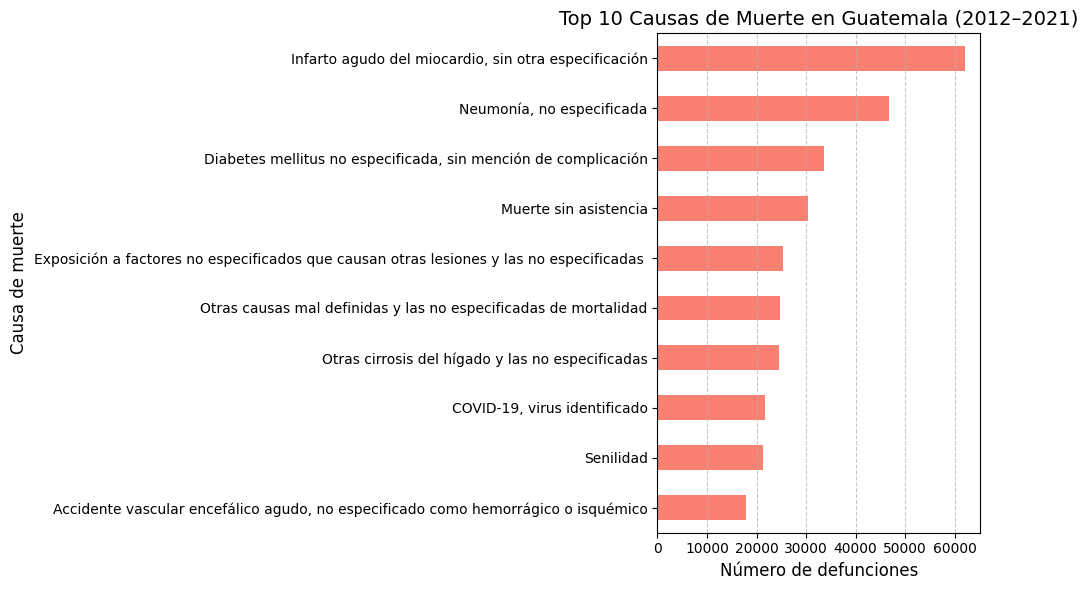

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivos
df = pd.read_csv("defunciones_clean.csv", low_memory=False)
cie = pd.read_csv("CIE.csv")

# Limpiar nombres de columnas
cie.columns = [col.lower().strip() for col in cie.columns]
cie.rename(columns={'codigo': 'codigo_cie', 'descripcion': 'descripcion_cie'}, inplace=True)

# Asegurar consistencia en ambas columnas para merge
df['causa'] = df['causa'].astype(str).str.strip()
cie['codigo_cie'] = cie['codigo_cie'].astype(str).str.strip()

# Unir los datos por el código CIE
df_merged = df.merge(cie, left_on='causa', right_on='codigo_cie', how='left')

# Ver los valores más frecuentes ya decodificados
frecuencias = df_merged['descripcion_cie'].value_counts().head(10)
print("Causas de muerte más frecuentes (ya decodificadas):\n")
print(frecuencias)

# Crear gráfico de barras horizontal
plt.figure(figsize=(10, 6))
frecuencias.sort_values().plot(kind='barh', color='salmon')
plt.title("Top 10 Causas de Muerte en Guatemala (2012–2021)", fontsize=14)
plt.xlabel("Número de defunciones", fontsize=12)
plt.ylabel("Causa de muerte", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Tras realizar el cruce de datos con el catálogo de la Clasificación Internacional de Enfermedades (CIE), se identificaron las principales causas de muerte en Guatemala durante el período analizado. Encabezan la lista las enfermedades no transmisibles, como el infarto agudo del miocardio, la diabetes mellitus y la cirrosis hepática, lo que refleja una alta carga de enfermedades crónicas en la población adulta y adulta mayor. Asimismo, destacan causas como la neumonía, la COVID-19 y la muerte sin asistencia médica, esta última no atribuible a una enfermedad específica, sino posiblemente a una falta de atención médica en el momento del fallecimiento. El gráfico de barras generado ilustra con claridad la magnitud de estas causas, mostrando que las enfermedades cardiovasculares, respiratorias e infecciosas son responsables de una parte considerable de las defunciones. Además, la presencia de causas mal definidas y sin especificar refuerza la idea de una posible debilidad en los sistemas de diagnóstico y registro. Este panorama sugiere la existencia de inequidades en salud y permite establecer líneas prioritarias de investigación, particularmente sobre los determinantes sociales y estructurales de la mortalidad, las brechas en atención médica y las condiciones que limitan la prevención y el tratamiento oportuno de enfermedades en el país.

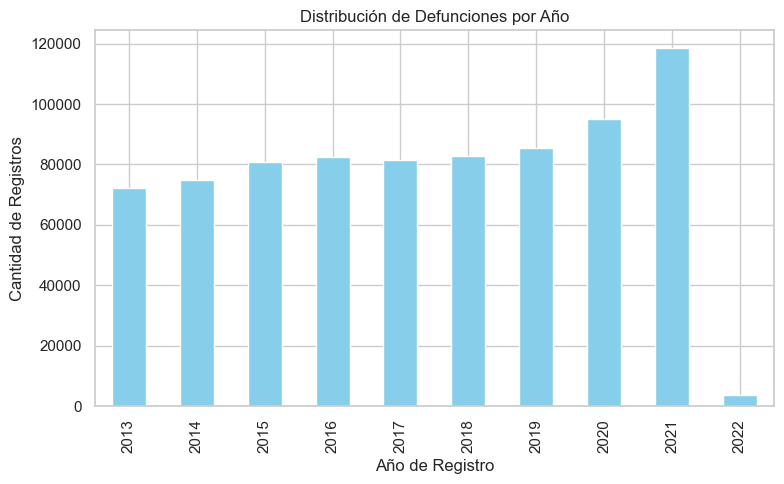

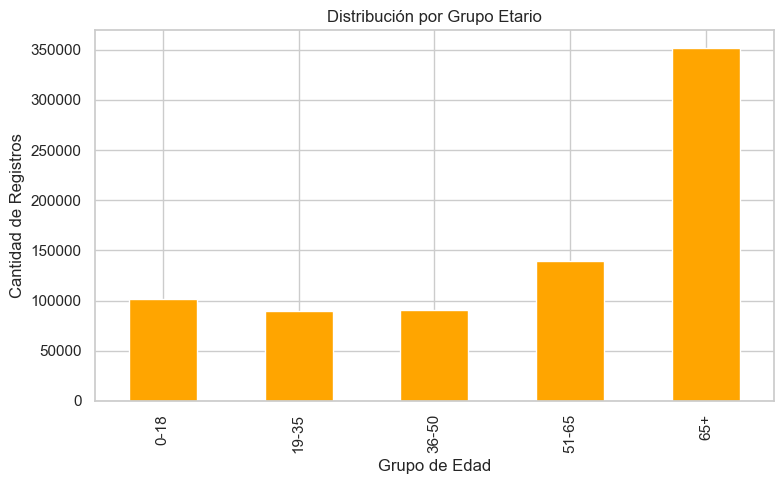

In [1]:
# Visualización de datos - Proyecto Defunciones INE Guatemala

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set(style="whitegrid")

# Cargar datos
df = pd.read_csv("defunciones_simplified.csv")

# =======================
# Histogramas
# =======================

# Histograma de registros por año
plt.figure(figsize=(8, 5))
df['año_registrado'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Defunciones por Año')
plt.xlabel('Año de Registro')
plt.ylabel('Cantidad de Registros')
plt.tight_layout()
plt.show()

# Histograma por grupo etario
plt.figure(figsize=(8, 5))
df['age_group'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Distribución por Grupo Etario')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Registros')
plt.tight_layout()
plt.show()

#### Interpretación de Histogramas

1. Distribución de Defunciones por Año de Registro: el gráfico muestra una tendencia general creciente en la cantidad de defunciones registradas entre 2013 y 2021. Destacan dos incrementos significativos: uno en 2020 y otro aún más marcado en 2021, lo cual podría estar asociado al impacto de la pandemia por COVID-19. En contraste, en 2022 se observa una caída abrupta, probablemente debido a datos aún no consolidados o parciales de ese año.

2. Distribución por Grupo Etario: la mayor concentración de defunciones ocurre en el grupo de personas mayores de 65 años, lo que es coherente con la mayor vulnerabilidad de este segmento poblacional. Los demás grupos etarios presentan cantidades similares, excepto el grupo de 51 a 65 años, que muestra un leve incremento. Esto resalta la necesidad de enfocar políticas de salud pública principalmente en adultos mayores.



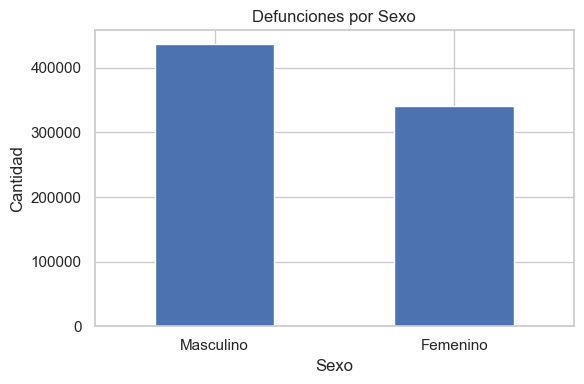

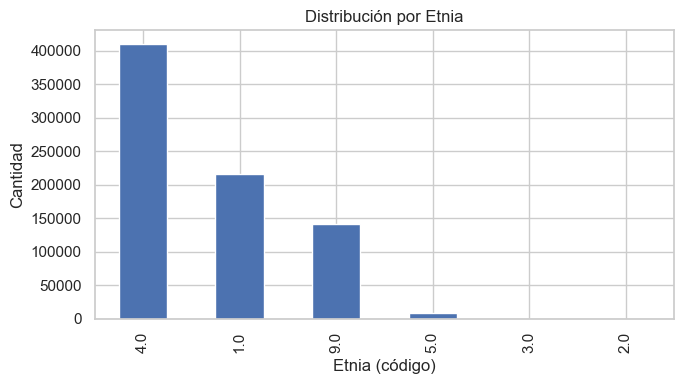

In [5]:

# =======================
# Gráficos de Barras
# =======================

# Por sexo
plt.figure(figsize=(6, 4))
df['sexo'].value_counts().plot(kind='bar')
plt.title('Defunciones por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Masculino', 'Femenino'], rotation=0)
plt.tight_layout()
plt.show()

# Por etnia
plt.figure(figsize=(7, 4))
df['etnia'].value_counts().plot(kind='bar')
plt.title('Distribución por Etnia')
plt.xlabel('Etnia (código)')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()



#### Interpretación de Gráficos de Barras

1. Defunciones por Sexo: el gráfico muestra una mayor cantidad de defunciones en hombres en comparación con mujeres. Esta diferencia podría explicarse por factores como mayor exposición a riesgos laborales, menor asistencia médica o condiciones de salud menos atendidas en la población masculina.

2. Distribución por Etnia: se observa una concentración alta de defunciones en el grupo con código 4.0, que probablemente corresponde a la población ladina o mestiza. Le siguen los grupos étnicos indígenas (1.0, 9.0). Esta distribución refleja tanto la composición demográfica del país como posibles desigualdades en acceso a salud o condiciones socioeconómicas.

3. 10 Causas de Muerte Más Frecuentes: las causas más comunes incluyen enfermedades cardiovasculares (infarto agudo del miocardio), respiratorias (neumonía y COVID-19), y crónicas como diabetes y cirrosis. También destaca la categoría de muertes sin asistencia, lo cual podría evidenciar barreras de acceso a servicios médicos. El impacto de la pandemia es visible en la presencia de COVID-19 como una de las principales causas.

C:\Users\usuario\AppData\Local\Temp\ipykernel_3184\1391945736.py:1: DtypeWarning: Columns (18,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  alt_df = pd.read_csv("defunciones.csv")


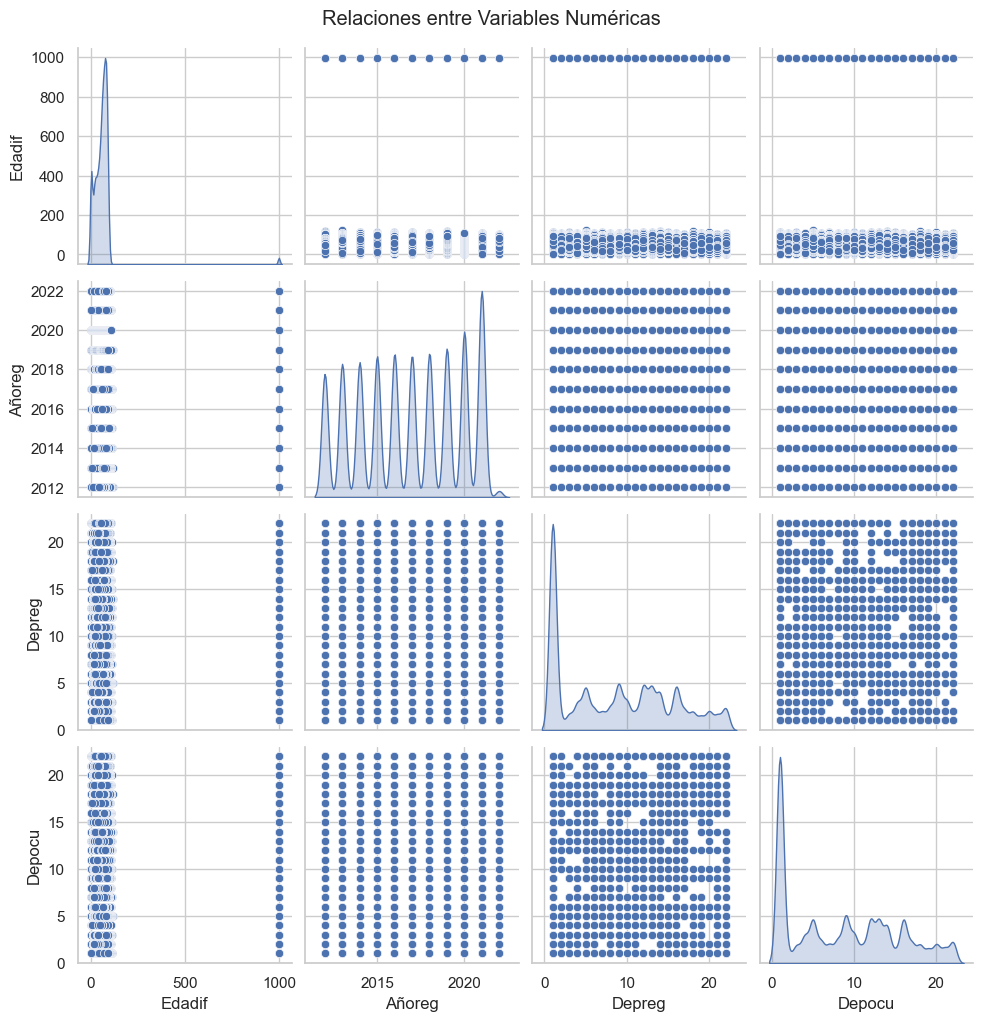

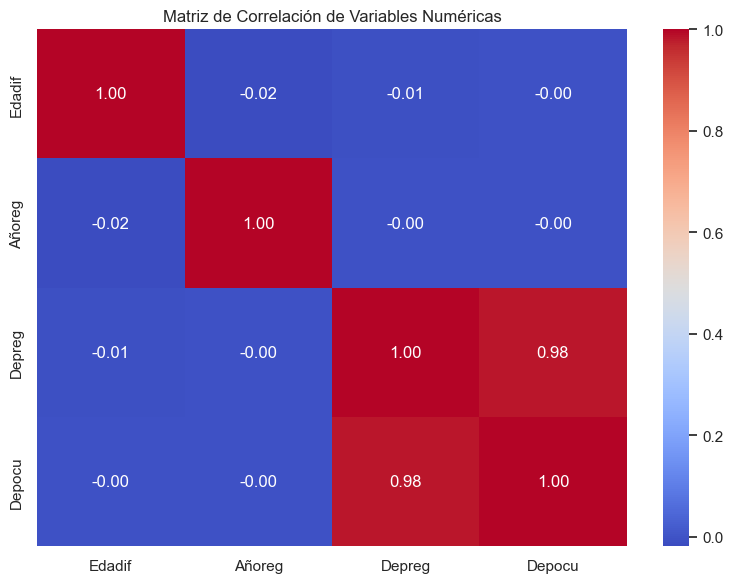

In [21]:
alt_df = pd.read_csv("defunciones.csv")

# Selección de variables numéricas relevantes
numeric_cols = ['Edadif', 'Añoreg', 'Depreg', 'Depocu']
numeric_df = alt_df[numeric_cols].dropna()

# Matriz de dispersión (pairplot)
sns.pairplot(numeric_df, diag_kind="kde")
plt.suptitle("Relaciones entre Variables Numéricas", y=1.02)
plt.show()

# Matriz de correlación
plt.figure(figsize=(8, 6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Variables Numéricas")
plt.tight_layout()
plt.show()


#### Interpretación de los Diagramas de Dispersión
Los diagramas de dispersión permiten observar posibles relaciones entre variables numéricas del conjunto de datos de defunciones:

Edadif muestra una concentración importante en edades menores a 100 años, pero también existen valores atípicos muy altos (outliers), lo cual podría requerir limpieza.

Añoreg tiene una distribución clara entre los años 2012 y 2022, con patrones de registro anuales.

Depreg y Depocu (departamentos de registro y ocurrencia) presentan una codificación numérica categórica (1 a 22) y se distribuyen uniformemente.

No se observan relaciones lineales fuertes entre ninguna de las variables.

Esto se confirma en la matriz de correlación, donde los coeficientes son bajos, cercanos a cero, lo que indica que no hay colinealidad entre estas variables. Esto es positivo si se planea usarlas como predictores independientes en modelos posteriores.